# FoDS Visualization Assignment
## DONE BY HARE SANKARAN RV - CSE17119

- [Qn1](#1)
- [Qn2](#2)
- [Qn3](#3)
- [Qn4](#4)
- [Qn5](#5)
- [Qn6](#6)
- [Qn7](#7)
- [Qn8](#8)
- [Qn9](#9)
- [Qn10](#10)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.animation as animation
from numpy import random
import folium

# 1

In [8]:
runs= [1000, 500, 2000, 2002, 1001, 4004, 3003, 1501, 6006, 2040, 1020, 4080, 4004, 2002, 8008, 3029, 1514, 6058, 1190, 595, 2380, 2012, 1006, 4024, 2000, 1000, 4000, 2001, 1000, 4002, 998, 499, 1996, 2002, 1001, 4004, 1992, 996, 3984, 2003, 1001, 4006, 1020, 510, 2040, 2004, 1002, 4008, 2005, 1002, 4010, 2006, 1003, 4012, 2007, 1003, 4014]
year= [x for x in range(2020-len(runs),2020)]

In [9]:
fig = plt.figure()  
axis = plt.axes(xlim =(min(year)-20, max(year)+20), ylim =(min(runs)-20, max(runs)+20))  
  
line, = axis.plot([], [], lw = 2)  

def init():  
    line.set_data([], [])  
    return line,  
   
xdata, ydata = [], []  

def animate(i):  
#     print(i)
    y = runs[i]
    x = year[i]
       
    xdata.append(x)  
    ydata.append(y)  
    line.set_data(xdata, ydata)  
      
    return line, 
 
anim = animation.FuncAnimation(fig, animate, init_func = init, 
                     frames = 57, interval = 20)
plt.close()

In [10]:
anim.save('wavex.mp4',writer='ffmpeg', fps = 4)

In [11]:
from IPython.display import Video

Video("wavex.mp4",embed=True)

# 2

In [2]:
info = pd.read_html("http://www.quickgs.com/latitudinal-and-longitudinal-extents-of-india-indian-states-and-cities/") 
coordinates = pd.DataFrame(info[0])
coordinates.head()

,State,Latitude,Longitude
0,Andhra Pradesh,15.91°N,79.74°E
1,Arunachal Pradesh,28.21°N,94.72°E
2,Assam,26.20°N,92.93°E
3,Bihar,25.09°N,85.31°E
4,Chhattisgarh,21.27°N,81.86°E


In [3]:
def data_pre(cord):
    return cord[0:5]

coordinates['Latitude']  = coordinates['Latitude'].apply(data_pre).astype('float')
coordinates['Longitude'] = coordinates['Longitude'].apply(data_pre).astype('float')
coordinates.head()

,State,Latitude,Longitude
0,Andhra Pradesh,15.91,79.74
1,Arunachal Pradesh,28.21,94.72
2,Assam,26.20,92.93
3,Bihar,25.09,85.31
4,Chhattisgarh,21.27,81.86


In [6]:
india = folium.Map(location = [20.5937,78.9629],zoom_start=4.5)

for state,lat,long in zip(list(coordinates['State']),list(coordinates['Latitude']),list(coordinates['Longitude'])):
    folium.CircleMarker(location = [lat,long],
                       radius = 5,
                       color='red',
                       fill = True,
                       fill_color="red").add_to(india)
    folium.Marker(location = [lat,long],
                  popup=folium.Popup(('<strong><b>State  : '+state+'</strong>'),max_width=200)).add_to(india)  

In [7]:
india

# ----------------------------BIKE SHARING DATASET--------------------------------------#

In [6]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2020-09-11 13:51:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K  29.1KB/s    in 9.4s    

2020-09-11 13:51:20 (29.1 KB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]



In [8]:
!unzip Bike-Sharing-Dataset.zip

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [15]:
!cat Readme.txt

In [5]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# 3

Text(0, 0.5, 'Count of Total Bike Rentals')

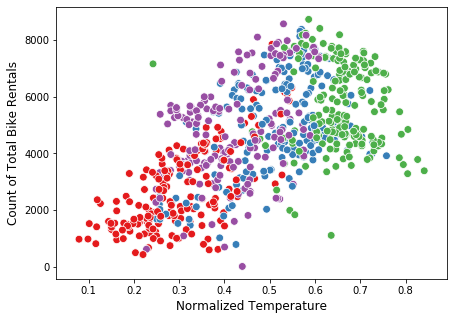

In [74]:
plt.figure(figsize=(7,5))
sns.scatterplot(y="cnt",x="atemp",data=data,hue='season',legend=None,palette='Set1',s=60)
plt.xlabel("Normalized Temperature",fontsize='large')
plt.ylabel("Count of Total Bike Rentals",fontsize='large')

# 4

In [28]:
data['season'] = data['season'].map({1:'spring', 2:'summer', 3:'fall/autumn', 4:'winter'})

Text(0.5, 1.0, 'Bike Rentals at different temperatures\nby Season')

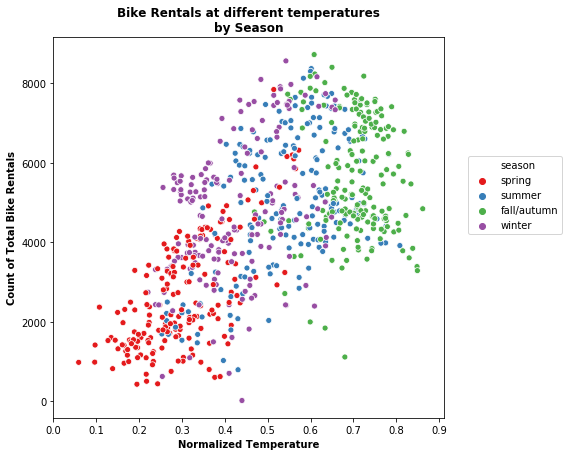

In [131]:
plt.figure(figsize=(7,7))
sns.scatterplot(y="cnt",x="temp",data=data,hue='season',palette='Set1')
plt.xticks(ticks=[x/10 for x in range(0,10)])
plt.xlabel("Normalized Temperature",fontweight='bold')
plt.ylabel("Count of Total Bike Rentals",fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 0.7))
plt.title("Bike Rentals at different temperatures\nby Season",fontweight='bold')

Text(0.5, 0.98, 'Bike Rentals at different temperatures\n by Season')

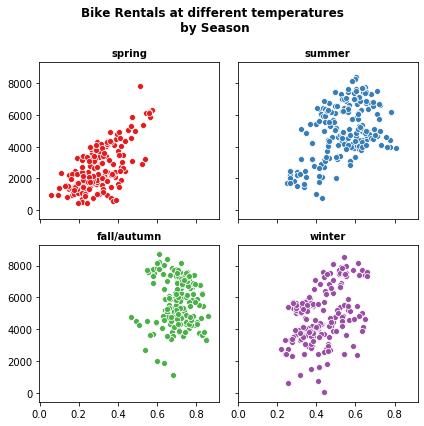

In [130]:
# #USING SEABORN

# g = sns.FacetGrid(data,hue='season', col="season",col_wrap=2,despine=False,sharex=True,sharey=True,palette="Set1")
# g.map_dataframe(sns.scatterplot,y="cnt",x="temp").set_titles("{col_name}",fontweight='bold')
# plt.subplots_adjust(top=0.85)
# g.fig.suptitle('Bike Rentals at different temperatures\n by Season',fontweight='bold')

# 5

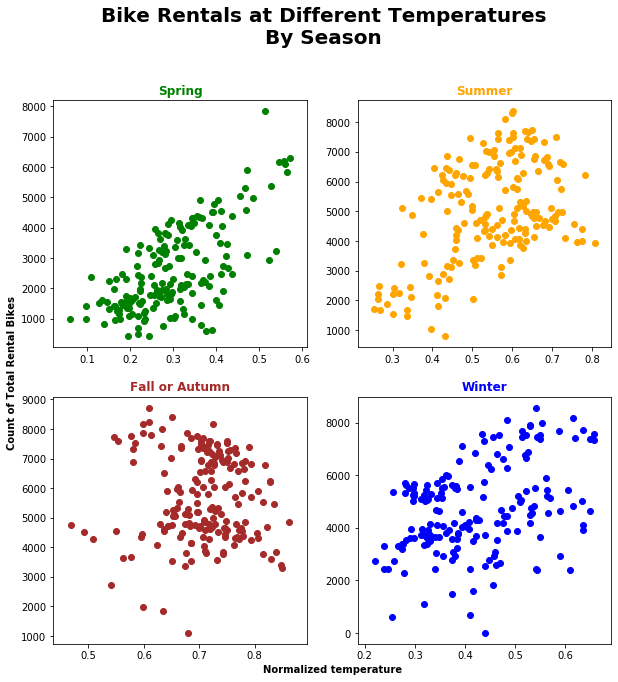

In [99]:
#USING MATPLOTLIB
fig = plt.figure(figsize=(10,10))

fig.suptitle('Bike Rentals at Different Temperatures\nBy Season', fontsize=20,fontweight="bold", color="black",position=(0.5,1.01))

ax1 = fig.add_subplot(221)
ax1.scatter('temp', 'cnt', data=data[data['season']=='spring'], c="green")
ax1.set_title('Spring', fontweight='bold', color="green")
ax1.set_ylabel("Count of Total Rental Bikes", fontweight='bold', position=(0,-0.1))


ax2 = fig.add_subplot(222)
ax2.scatter('temp', 'cnt', data=data[data['season']=='summer'], c="orange")
ax2.set_title('Summer',fontweight='bold', color="orange")



ax3 = fig.add_subplot(223)
ax3.scatter('temp', 'cnt', data=data[data['season']=='fall/autumn'], c="brown")
ax3.set_title('Fall or Autumn',fontweight='bold', color="brown")


ax4 = fig.add_subplot(224)
ax4.scatter('temp', 'cnt', data=data[data['season']=='winter'], c="blue")
ax4.set_title("Winter",fontweight='bold', color="blue")
ax4.set_xlabel("Normalized temperature", fontweight='bold', position=(-0.1,0));

# 6

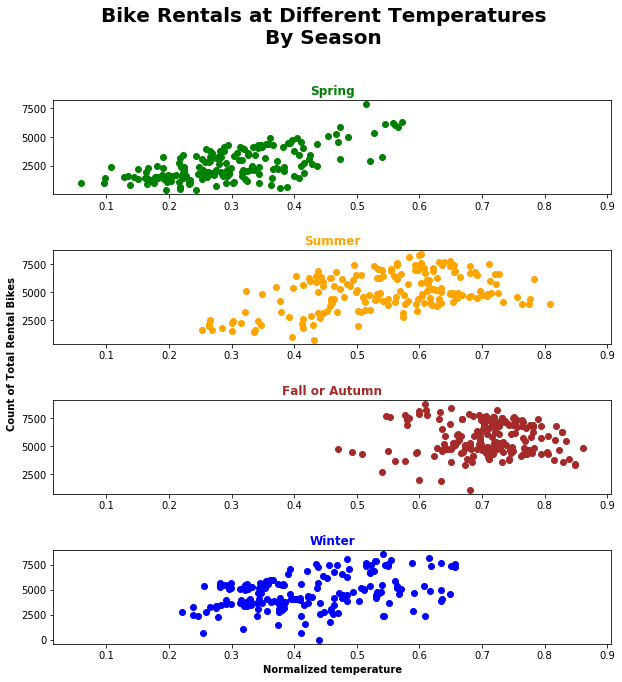

In [105]:
#USING MATPLOTLIB
fig = plt.figure(figsize=(10,10))

fig.suptitle('Bike Rentals at Different Temperatures\nBy Season', fontsize=20,fontweight="bold", color="black",position=(0.5,1.01))

plt.subplots_adjust(hspace=0.60)

ax2 = fig.add_subplot(412)
ax2.scatter('temp', 'cnt', data=data[data['season']=='summer'], c="orange")
ax2.set_title('Summer',fontweight='bold', color="orange")
ax2.set_ylabel("Count of Total Rental Bikes", fontweight='bold', position=(0,-0.1))


ax1 = fig.add_subplot(411,sharex=ax2)
ax1.scatter('temp', 'cnt', data=data[data['season']=='spring'], c="green")
ax1.set_title('Spring', fontweight='bold', color="green")


ax3 = fig.add_subplot(413,sharex=ax2)
ax3.scatter('temp', 'cnt', data=data[data['season']=='fall/autumn'], c="brown")
ax3.set_title('Fall or Autumn',fontweight='bold', color="brown")


ax4 = fig.add_subplot(414,sharex=ax2)
ax4.scatter('temp', 'cnt', data=data[data['season']=='winter'], c="blue")
ax4.set_title("Winter",fontweight='bold', color="blue")
ax4.set_xlabel("Normalized temperature", fontweight='bold', position=(0.5,0));

# 7

Text(0.5, 1.0, 'Winter')

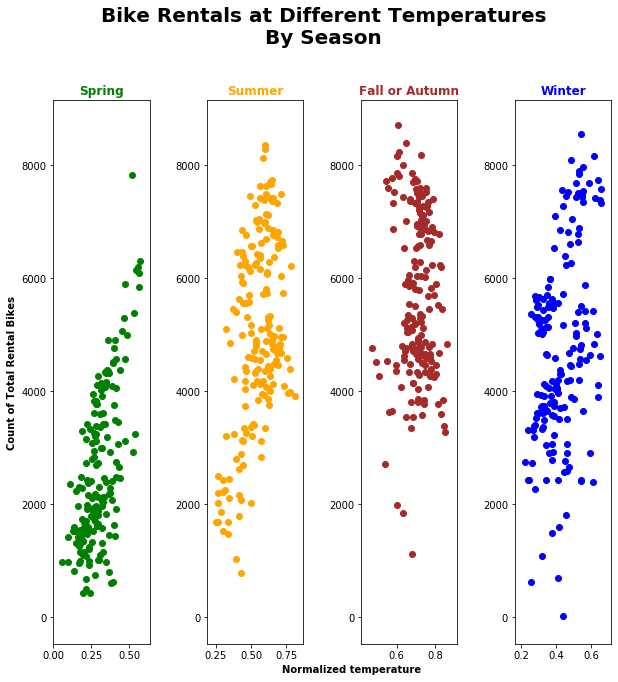

In [117]:
#USING MATPLOTLIB
fig = plt.figure(figsize=(10,10))

fig.suptitle('Bike Rentals at Different Temperatures\nBy Season', fontsize=20,fontweight="bold", color="black",position=(0.5,1.01))

plt.subplots_adjust(wspace=0.60)

ax3 = fig.add_subplot(143)
ax3.scatter('temp', 'cnt', data=data[data['season']=='fall/autumn'], c="brown")
ax3.set_title('Fall or Autumn',fontweight='bold', color="brown")


ax1 = fig.add_subplot(141,sharey=ax3)
ax1.scatter('temp', 'cnt', data=data[data['season']=='spring'], c="green")
ax1.set_title('Spring', fontweight='bold', color="green")
ax1.set_ylabel("Count of Total Rental Bikes", fontweight='bold', position=(0,0.5))

ax2 = fig.add_subplot(142,sharey=ax3)
ax2.scatter('temp', 'cnt', data=data[data['season']=='summer'], c="orange")
ax2.set_title('Summer',fontweight='bold', color="orange")
ax2.set_xlabel("Normalized temperature", fontweight='bold', position=(1.5,0));

ax4 = fig.add_subplot(144,sharey=ax3)
ax4.scatter('temp', 'cnt', data=data[data['season']=='winter'], c="blue")
ax4.set_title("Winter",fontweight='bold', color="blue")


# 8

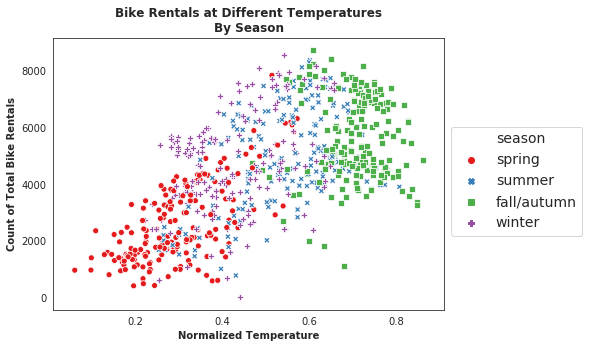

In [154]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='temp', y='cnt', hue='season', data=data, style='season', palette='Set1', legend='full')
plt.legend(bbox_to_anchor=(1, 0.7), fontsize=14)
plt.xlabel('Normalized Temperature',  fontweight='bold')
plt.ylabel('Count of Total Bike Rentals',fontweight='bold')
plt.title('Bike Rentals at Different Temperatures\nBy Season' ,fontweight='bold', position=(0.5,1));

# 9

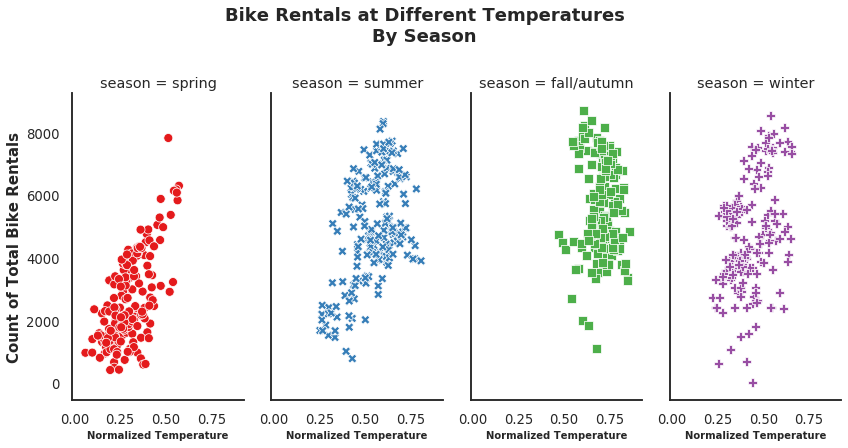

In [174]:
sns.set_context('talk', font_scale=0.8) 
g = sns.relplot(x='temp', y='cnt', hue='season', data=data,palette='Set1', 
                    col='season', legend=False,height=6, aspect=0.5, style='season', sizes=(800,1000))
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Bike Rentals at Different Temperatures\nBy Season' ,position=(0.5,1.05), fontweight='bold', size=18)
g.set_xlabels("Normalized Temperature",fontweight='bold', size=10)
# g.set_xticks([0,0.25,0.5])
g.set_ylabels("Count of Total Bike Rentals",fontweight='bold', size=15);

# 10

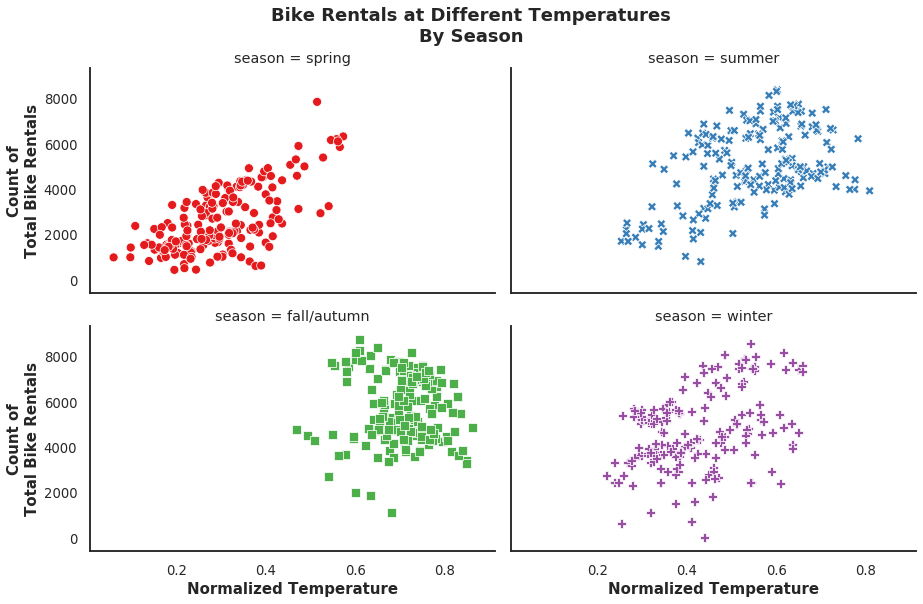

In [176]:
g = sns.relplot(x='temp', y='cnt', hue='season', data=data,palette='Set1',
                col='season', col_wrap=2, legend=False,height=4, aspect=1.6, style='season', sizes=(800,1000))

g.fig.suptitle('Bike Rentals at Different Temperatures\nBy Season' ,position=(0.5,1.05), fontweight='bold', size=18)
g.set_xlabels("Normalized Temperature",fontweight='bold', size=15)
g.set_ylabels("Count of\nTotal Bike Rentals",fontweight='bold', size=15);